In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Multiple Linear Regression
#### Engineering formula through machine learning to calculate insurance premiums
#### Data set obtained from: https://www.kaggle.com/datasets/simranjain17/insurance

In [6]:
prem_data = pd.read_csv('insurance.csv')

In [7]:
prem_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
prem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
prem_data.isnull().sum()
# no null values - perfect

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [49]:
prem_data.describe()

,age,bmi,children,charges,sex_c,smoker_c,region_c
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,1.515695
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,2.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


#### Examining unique values of certain columns + if they can be categorised

In [10]:
prem_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
prem_data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
prem_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
prem_data['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [14]:
prem_data['sex'] = prem_data['sex'].astype('category')
prem_data['sex_c'] = prem_data['sex'].cat.codes
prem_data['smoker'] = prem_data['smoker'].astype('category')
prem_data['smoker_c'] = prem_data['smoker'].cat.codes
prem_data['region'] = prem_data['region'].astype('category')
prem_data['region_c'] = prem_data['region'].cat.codes
#new columns are created so we can keep track of what category is converted to which number

In [15]:
prem_data['sex_c'] = prem_data['sex_c'].astype('float')
prem_data['smoker_c'] = prem_data['smoker_c'].astype('float')
prem_data['region_c'] = prem_data['region_c'].astype('float')

In [16]:
prem_data.head()

,age,sex,bmi,children,smoker,region,charges,sex_c,smoker_c,region_c
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,1.0,3.0
1,18,male,33.770,1,no,southeast,1725.55230,1.0,0.0,2.0
2,28,male,33.000,3,no,southeast,4449.46200,1.0,0.0,2.0
3,33,male,22.705,0,no,northwest,21984.47061,1.0,0.0,1.0
4,32,male,28.880,0,no,northwest,3866.85520,1.0,0.0,1.0


#### Setting up predictors

In [19]:
X = prem_data.drop(columns = ['charges','sex','smoker','region'])
X
# the original columns for sex, smoker and region are dropped as model will not utilise these
# sex: Female - 0, Male - 1
# smoker: yes - 1, No - 0
# region: southwest - 3, southeast - 2, northwest - 1, northeast - 0

,age,bmi,children,sex_c,smoker_c,region_c
0,19,27.900,0,0.0,1.0,3.0
1,18,33.770,1,1.0,0.0,2.0
2,28,33.000,3,1.0,0.0,2.0
3,33,22.705,0,1.0,0.0,1.0
4,32,28.880,0,1.0,0.0,1.0
...,...,...,...,...,...,...
1333,50,30.970,3,1.0,0.0,1.0
1334,18,31.920,0,0.0,0.0,0.0
1335,18,36.850,0,0.0,0.0,2.0
1336,21,25.800,0,0.0,0.0,3.0


#### Setting up Premium Charges as target

In [20]:
y = prem_data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
# Splitting data set between training and test data, 70/30 split

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
c = lr.intercept_
c
# determined constant

-10936.55643749617

In [26]:
m = lr.coef_
m
# model determined weightings on each predictor
# smoking has a big influence on premiums whereas region and children does not

array([  252.15440619,   316.514758  ,   351.46251009,  -281.16765835,
       24044.37169738,  -318.49464584])

In [32]:
y_pred_train = lr.predict(X_train)

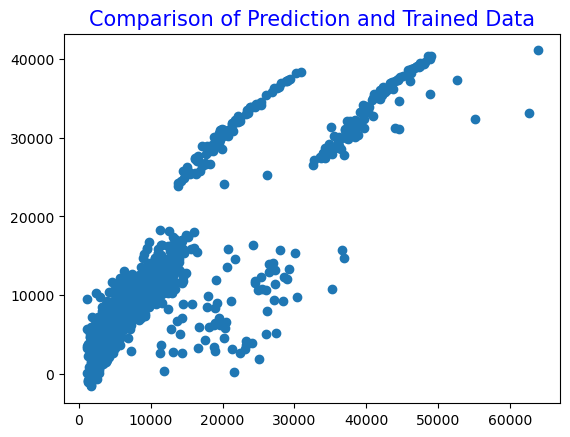

In [31]:
plt.scatter(y_train, y_pred_train)
plt.title('Comparison of Prediction and Trained Data', size = 15, color = 'b');

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_train, y_pred_train)

0.7544083642384214

#### Using r2 score, predictions are only ~75% accurate

In [33]:
y_pred_test = lr.predict(X_test)
y_pred_test
# Predictions on test predictors

array([ 4.50048433e+03,  1.28194579e+04,  1.23977127e+04,  1.34303433e+04,
        5.31776110e+02,  3.22642696e+04,  1.30762461e+04,  1.22348298e+04,
        3.82932402e+03,  3.01565286e+04,  1.13198257e+04,  1.72084618e+04,
        8.91832075e+03,  8.22883518e+03,  3.58166904e+03,  1.01918742e+04,
        3.97134424e+03,  6.75521017e+03,  1.52141457e+04,  1.42498228e+04,
        1.24184207e+04,  3.34497470e+04,  9.12417099e+03,  8.85380484e+03,
        3.13406481e+03,  8.14417612e+03,  9.33914668e+03,  1.10793027e+04,
        7.54531559e+03,  4.40537383e+03,  1.39112972e+04,  5.64886526e+03,
        3.46827850e+04,  2.74022377e+04,  3.38105315e+04,  9.52560370e+03,
        3.06087668e+04,  2.67066855e+04,  1.54113111e+04,  3.41398489e+04,
        6.63468968e+03,  1.39736793e+04,  1.08971678e+04,  1.47980620e+04,
        4.09741953e+03,  1.29622798e+04,  4.71597335e+03,  2.92771692e+04,
        7.31791501e+03,  1.39529721e+04,  1.35190763e+04,  1.20798653e+04,
        2.00264361e+03,  

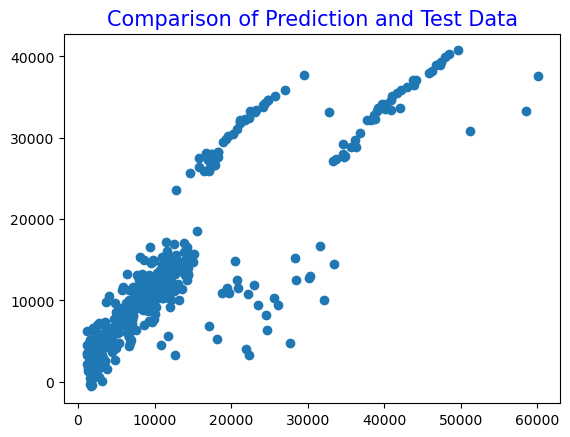

In [34]:
plt.scatter(y_test, y_pred_test)
plt.title('Comparison of Prediction and Test Data', size = 15, color = 'b');

In [38]:
r2_score(y_test, y_pred_test)

0.740367716897532

#### Model is only accurate ~74% of the time on test data

# Using the model now to calculate premiums based on given parameters

In [39]:
dood = [[20,30,0,1,0,2]]

# Age - 20, bmi - 30, children -  0, sex - 1, smoker - 0, region - 2

In [40]:
custom_pred = lr.predict(dood)
custom_pred

C:\Users\ton77\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2683.81747629])

In [50]:
dood_2 = [[40,35,3,1,1,2]]

# Age - 40, bmi - 35, children -  3, sex - 1, smoker - 1, region - 2

In [51]:
custom_pred_2 = lr.predict(dood_2)
custom_pred_2

C:\Users\ton77\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34408.23861774])

#### Examining the difference in premiums between the 2 persons, the premiums calculated make sense. An older person who has higher bmi and is a smoker will be charged higher premiums (34k compared to 2.6k) as they will be more likely to obtain payout due to the risk factors they face